import section

In [47]:
import pandas as pd
from pandas import DataFrame
import ast
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [48]:
# Load the sales data
sales_df = pd.read_csv('data/sale.csv', sep=',')

# Load the menu data
menu_df = pd.read_csv('data/menus.csv', sep=',')

# Load the add-on data
add_on_df = pd.read_csv('data/add-on.csv', sep=',')

# Check basic info of each dataframe
menu_df.info(), sales_df.info(), add_on_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uuid         48 non-null     object 
 1   name         48 non-null     object 
 2   category     48 non-null     object 
 3   price        48 non-null     float64
 4   description  48 non-null     object 
 5   cost         48 non-null     float64
dtypes: float64(2), object(4)
memory usage: 2.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108000 entries, 0 to 107999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   uuid       108000 non-null  object
 1   date_time  108000 non-null  object
 2   menu_item  108000 non-null  object
 3   add_ons    108000 non-null  object
dtypes: object(4)
memory usage: 3.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column  Non-N

(None, None, None)

Additional function

In [49]:
def calculate_addon_price(addons: str, addons_df: DataFrame) -> float:
    """
    Calculate the total price of add-ons based on a list of add-ons and their prices.
    
    Parameters:
    addons (str): String representation of a list of add-ons.
    addons_df (DataFrame): DataFrame containing add-ons and their prices.
    
    Returns:
    float: Total price of all add-ons.
    """
    addons_list = ast.literal_eval(addons)  # Convert the string representation of list to actual list
    total_price = 0

    # Iterate through each addon in addons_list
    for addon in addons_list:
        price_series = addons_df.loc[addons_df['name'] == addon, 'price']

        # Check if the addon exists in addons_df
        if not price_series.empty:
            total_price += price_series.values[0]

    return total_price

Preparation section

In [50]:
# Ensure 'price' is of type float
menu_df['price'] = menu_df['price'].astype(float)

# Drop unnecessary columns: 'uuid' and 'description'
menu_df = menu_df.drop(columns=['uuid', 'description'])

# Rename column 'name' to 'menu_name' for consistency
menu_df = menu_df.rename(columns={'name': 'menu_name'})

# Drop rows with any NaN values
menu_df = menu_df.dropna(axis=0, how='any')

# Information about the cleaned DataFrame
menu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   menu_name  48 non-null     object 
 1   category   48 non-null     object 
 2   price      48 non-null     float64
 3   cost       48 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.6+ KB


In [51]:
# Drop unnecessary columns
sales_df = sales_df.drop(columns=['uuid'])

# Rename column for consistency
sales_df = sales_df.rename(columns={'menu_item': 'menu_name'})

# Sort by date_time and reset index
sales_df = sales_df.sort_values('date_time', ascending=True).reset_index(drop=True)

# Drop rows with any NaN values
sales_df = sales_df.dropna(axis=0, how='any')

# Display DataFrame information
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108000 entries, 0 to 107999
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date_time  108000 non-null  object
 1   menu_name  108000 non-null  object
 2   add_ons    108000 non-null  object
dtypes: object(3)
memory usage: 2.5+ MB


In [52]:
# Drop unnecessary columns
add_on_df = add_on_df.drop(columns=['uuid'])

# Drop rows with any NaN values
add_on_df = add_on_df.dropna(axis=0, how='any')

# Display DataFrame information
add_on_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   menu    46 non-null     object 
 1   name    46 non-null     object 
 2   price   46 non-null     float64
 3   cost    46 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.6+ KB


In [53]:
# Merge menu and sales data on 'menu_name'
merged_df = pd.merge(menu_df, sales_df, on='menu_name', how='inner')

# Drop rows with any NaN values
merged_df = merged_df.dropna(axis=0, how='any')

# Convert 'date_time' to datetime format
merged_df["date_time"] = pd.to_datetime(merged_df["date_time"])

# Sort by 'date_time' and reset index
merged_df = merged_df.sort_values(by='date_time', ascending=True).reset_index(drop=True)

# Extract 'date' and 'time' from 'date_time'
merged_df["date"] = merged_df["date_time"].dt.strftime("%Y-%m-%d")
merged_df["time"] = merged_df["date_time"].dt.strftime("%H:%M")

merged_df["add_ons_price"] = merged_df["add_ons"].apply(lambda x: calculate_addon_price(x, add_on_df))

# Calculate total price by adding 'add_ons_price' and 'price'
merged_df["total_price"] = merged_df["add_ons_price"] + merged_df["price"]

# Display DataFrame information
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108000 entries, 0 to 107999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   menu_name      108000 non-null  object        
 1   category       108000 non-null  object        
 2   price          108000 non-null  float64       
 3   cost           108000 non-null  float64       
 4   date_time      108000 non-null  datetime64[ns]
 5   add_ons        108000 non-null  object        
 6   date           108000 non-null  object        
 7   time           108000 non-null  object        
 8   add_ons_price  108000 non-null  float64       
 9   total_price    108000 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 8.2+ MB


In [54]:
missing_values = merged_df.isnull().sum()
print(missing_values)

menu_name        0
category         0
price            0
cost             0
date_time        0
add_ons          0
date             0
time             0
add_ons_price    0
total_price      0
dtype: int64


In [55]:
# Display the first few rows of the final merged dataframe
merged_df.head(20)

,menu_name,category,price,cost,date_time,add_ons,date,time,add_ons_price,total_price
0,Cheese & tomato,Toasties On Sourdough,7.0,6.33,2021-07-28 07:02:12.172286,[],2021-07-28,07:02,0.0,7.0
1,NEW YORK BAGEL BENEDICT,All day breakfast,13.0,12.89,2021-07-28 07:08:12.172286,[],2021-07-28,07:08,0.0,13.0
2,Hot Chocolate,Beverage,4.0,3.60,2021-07-28 07:08:12.172286,"['Marshmallows', 'Whipped Cream', 'Marshmallows']",2021-07-28,07:08,1.5,5.5
3,"EGG, BACON & CHEESE TOASTIE",All day breakfast,10.5,9.05,2021-07-28 07:19:12.172286,[],2021-07-28,07:19,0.0,10.5
4,OPEN LAMB SOUVLAKI,All day lunch,18.5,18.04,2021-07-28 07:26:12.172286,[],2021-07-28,07:26,0.0,18.5
5,Anzac Biscuit,"CAKES, SLICES & SWEETS",22.0,20.87,2021-07-28 07:34:12.172286,[],2021-07-28,07:34,0.0,22.0
6,Fairy Bread,"CAKES, SLICES & SWEETS",26.0,25.79,2021-07-28 07:49:12.172286,[],2021-07-28,07:49,0.0,26.0
7,Mocha,Beverage,5.0,3.76,2021-07-28 07:49:12.172286,[],2021-07-28,07:49,0.0,5.0
8,BURRITO BOWL,All day lunch,18.5,18.19,2021-07-28 07:52:12.172286,[],2021-07-28,07:52,0.0,18.5
9,Flat White,Beverage,4.0,2.69,2021-07-28 07:56:12.172286,['Vanilla Syrup'],2021-07-28,07:56,0.5,4.5


**Analysis section**

---

In [56]:
# Analyze merged_df for negative prices
negative_price = merged_df[merged_df['price'] < 0]
negative_add_ons_price = merged_df[merged_df['add_ons_price'] < 0]
negative_total_price = merged_df[merged_df['total_price'] < 0]

# Display dataframes with negative values
print("Rows with negative 'price':")
print(negative_price)

print("\nRows with negative 'add_ons_price':")
print(negative_add_ons_price)

print("\nRows with negative 'total_price':")
print(negative_total_price)

Rows with negative 'price':
Empty DataFrame
Columns: [menu_name, category, price, cost, date_time, add_ons, date, time, add_ons_price, total_price]
Index: []

Rows with negative 'add_ons_price':
Empty DataFrame
Columns: [menu_name, category, price, cost, date_time, add_ons, date, time, add_ons_price, total_price]
Index: []

Rows with negative 'total_price':
Empty DataFrame
Columns: [menu_name, category, price, cost, date_time, add_ons, date, time, add_ons_price, total_price]
Index: []


In [57]:
# Display first few rows and summary statistics of add_on_df
add_on_df.head()

,menu,name,price,cost
0,Sparkling Water,Ice,0.0,1.24
1,Sparkling Water,Lemon Slice,0.5,0.58
2,Sparkling Water,Lime Slice,0.5,0.65
3,Cola,Ice,0.0,0.48
4,Cola,Lemon Slice,0.5,0.32


In [58]:
add_on_df.describe()

,price,cost
count,46.000000,46.000000
mean,1.380435,1.236739
std,1.539065,1.194376
min,0.000000,0.010000
25%,0.500000,0.320000
50%,0.500000,0.805000
75%,2.500000,1.435000
max,4.500000,4.050000


In [59]:
# Count occurrences of each menu in add_on_df
menu_counts = add_on_df['menu']
menu_counts.value_counts()

menu
EGGS ON TOAST                  6
Hot Chocolate                  4
Mocha                          4
AVOCADO TOAST                  4
Cappuccino                     4
Latte                          4
Flat White                     4
Sparkling Water                3
NEW YORK BAGEL BENEDICT        3
Lemonade                       2
Cola                           2
BURRITO BOWL                   1
Long Black                     1
Espresso                       1
Orange Juice                   1
Apple Juice                    1
HUEVOS (SPANISH BAKED EGGS)    1
Name: count, dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


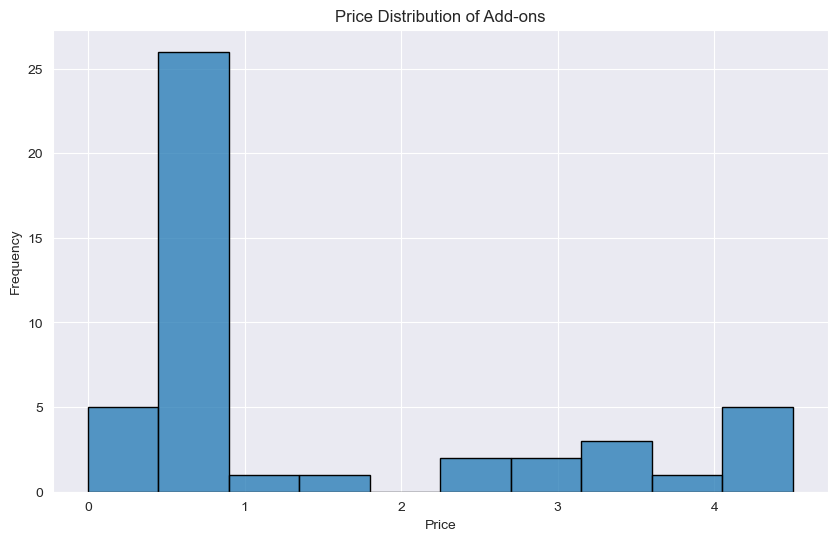

In [60]:
# Plotting the distribution of add-on prices using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(add_on_df['price'], bins=10, kde=False, edgecolor='black')  # Plot histogram with 10 bins
plt.title('Price Distribution of Add-ons')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)  # Add grid lines for better readability
plt.show()

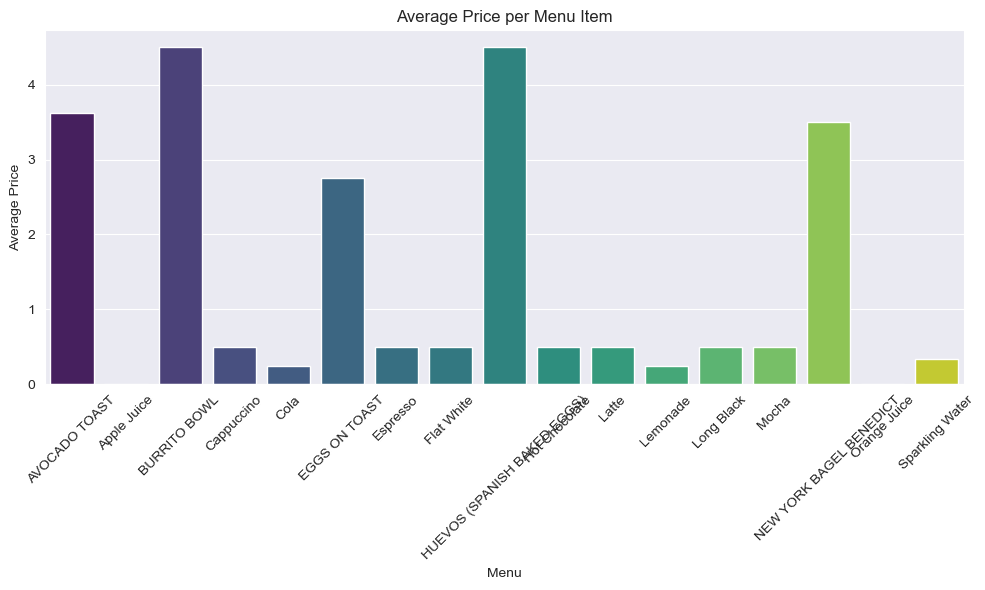

In [61]:
# Calculate average price per menu item
average_price_per_menu = add_on_df.groupby('menu')['price'].mean().reset_index()

# Plotting average price per menu item using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='menu', y='price', data=average_price_per_menu, palette='viridis')
plt.title('Average Price per Menu Item')
plt.xlabel('Menu')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent overlap of labels
plt.show()

In [62]:
# Convert 'date' column to datetime format if not already
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Extract day of the week and add it as a new column
merged_df['day_of_week'] = merged_df['date'].dt.day_name()

In [63]:
merged_df.head()

,menu_name,category,price,cost,date_time,add_ons,date,time,add_ons_price,total_price,day_of_week
0,Cheese & tomato,Toasties On Sourdough,7.0,6.33,2021-07-28 07:02:12.172286,[],2021-07-28,07:02,0.0,7.0,Wednesday
1,NEW YORK BAGEL BENEDICT,All day breakfast,13.0,12.89,2021-07-28 07:08:12.172286,[],2021-07-28,07:08,0.0,13.0,Wednesday
2,Hot Chocolate,Beverage,4.0,3.60,2021-07-28 07:08:12.172286,"['Marshmallows', 'Whipped Cream', 'Marshmallows']",2021-07-28,07:08,1.5,5.5,Wednesday
3,"EGG, BACON & CHEESE TOASTIE",All day breakfast,10.5,9.05,2021-07-28 07:19:12.172286,[],2021-07-28,07:19,0.0,10.5,Wednesday
4,OPEN LAMB SOUVLAKI,All day lunch,18.5,18.04,2021-07-28 07:26:12.172286,[],2021-07-28,07:26,0.0,18.5,Wednesday


In [64]:
merged_df.describe()

,price,cost,date_time,date,add_ons_price,total_price
count,108000.000000,108000.000000,108000,108000,108000.000000,108000.000000
mean,7.908296,6.950867,2023-01-18 00:46:44.103952896,2023-01-17 13:37:54.400000,0.242491,8.150787
min,3.000000,1.450000,2021-07-28 07:02:12.172286,2021-07-28 00:00:00,0.000000,3.000000
25%,4.000000,2.690000,2022-04-23 12:18:57.172285952,2022-04-23 00:00:00,0.000000,4.000000
50%,5.000000,4.120000,2023-01-18 07:59:42.172285952,2023-01-18 00:00:00,0.000000,5.000000
75%,10.500000,9.050000,2023-10-13 08:25:12.172285952,2023-10-13 00:00:00,0.000000,10.500000
max,26.000000,25.790000,2024-07-11 14:57:12.172286,2024-07-11 00:00:00,16.500000,30.500000
std,5.940771,6.014544,NaN,NaN,1.050326,6.051786


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


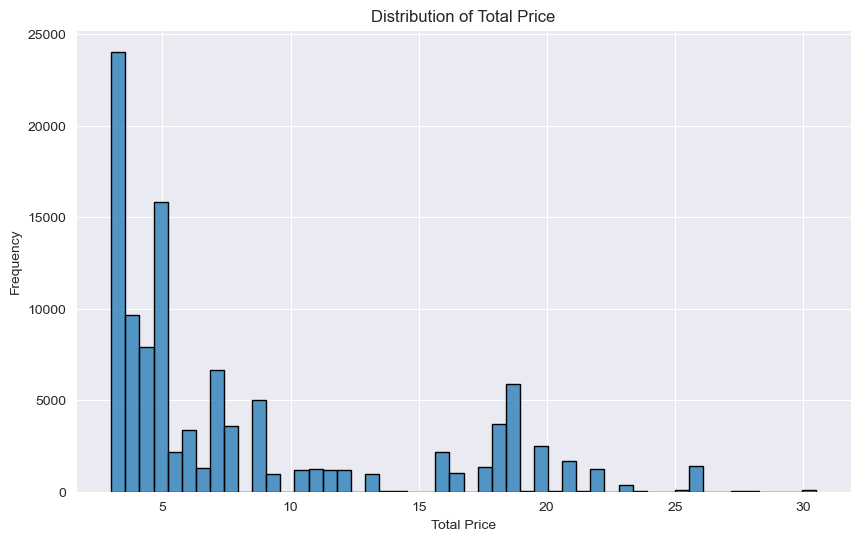

In [65]:
# Plotting the distribution of total prices using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['total_price'], bins=50, kde=False, edgecolor='black')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.title('Distribution of Total Price')
plt.grid(True)  # Add grid lines for better readability
plt.show()

In [66]:
# Get unique categories
categories = merged_df['category'].unique()

# Prepare data for ANOVA
data = [merged_df[merged_df['category'] == category]['total_price'] for category in categories]

# Perform ANOVA
f_val, p_val = stats.f_oneway(*data)

# Print ANOVA results
print(f'ANOVA results: F-value = {f_val}, P-value = {p_val}')

ANOVA results: F-value = 106720.70619824414, P-value = 0.0


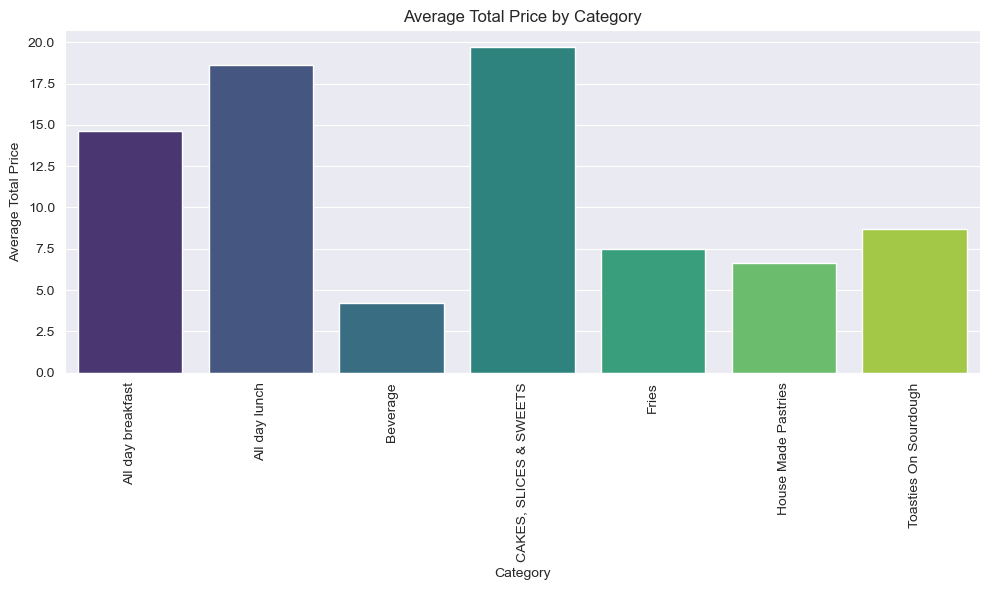

In [67]:
# Calculate average total price by category
avg_price_by_category = merged_df.groupby('category')['total_price'].mean().reset_index()

# Plotting average total price by category using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='total_price', data=avg_price_by_category, palette='viridis')
plt.xlabel('Category')
plt.ylabel('Average Total Price')
plt.title('Average Total Price by Category')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent overlap of labels
plt.show()

# analyze sale

In [68]:
sale_analyze_df = merged_df

In [69]:
sale_analyze_df.head()

,menu_name,category,price,cost,date_time,add_ons,date,time,add_ons_price,total_price,day_of_week
0,Cheese & tomato,Toasties On Sourdough,7.0,6.33,2021-07-28 07:02:12.172286,[],2021-07-28,07:02,0.0,7.0,Wednesday
1,NEW YORK BAGEL BENEDICT,All day breakfast,13.0,12.89,2021-07-28 07:08:12.172286,[],2021-07-28,07:08,0.0,13.0,Wednesday
2,Hot Chocolate,Beverage,4.0,3.60,2021-07-28 07:08:12.172286,"['Marshmallows', 'Whipped Cream', 'Marshmallows']",2021-07-28,07:08,1.5,5.5,Wednesday
3,"EGG, BACON & CHEESE TOASTIE",All day breakfast,10.5,9.05,2021-07-28 07:19:12.172286,[],2021-07-28,07:19,0.0,10.5,Wednesday
4,OPEN LAMB SOUVLAKI,All day lunch,18.5,18.04,2021-07-28 07:26:12.172286,[],2021-07-28,07:26,0.0,18.5,Wednesday


In [70]:
# Calculate sales for each item
sale_analyze_df['sales'] = sale_analyze_df['price'] * sale_analyze_df.groupby('menu_name')['menu_name'].transform(
    'count')

# Total sales
total_sales = sale_analyze_df['sales'].sum()

# Print total estimated sales
print(f'Total estimated sales: ${total_sales:.2f}')

Total estimated sales: $2074699998.00


In [71]:
# Define time categories
def categorize_time(hour):
    if 6 <= hour < 11:
        return 'Breakfast'
    elif 11 <= hour < 14:
        return 'Lunch'
    elif 14 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Dinner'
    else:
        return 'Other'

In [72]:
# Function to plot bars for aggregated data
def plot_bars(agg_data, title, x_label, y_label):
    """
    Plots a bar chart for aggregated data.

    Parameters:
    - agg_data: Pandas Series or DataFrame containing aggregated data.
    - title: Title of the plot.
    - x_label: Label for the x-axis.
    - y_label: Label for the y-axis.
    """
    agg_data.plot(kind='bar', figsize=(12, 6))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming agg_data is a Pandas Series or DataFrame with aggregated data

# Plotting example:
# plot_bars(agg_data, 'Title of the Plot', 'X-axis Label', 'Y-axis Label')

In [73]:
# Assuming sale_analyze_df is already defined and contains necessary columns

# Extract year, month, day, and hour from date_time
sale_analyze_df['year'] = sale_analyze_df['date_time'].dt.year
sale_analyze_df['month'] = sale_analyze_df['date_time'].dt.month
sale_analyze_df['day'] = sale_analyze_df['date_time'].dt.day
sale_analyze_df['hour'] = sale_analyze_df['date_time'].dt.hour

# Calculate total sales, total cost, and total sale difference (sales - cost) for all data
total_sales_all = sale_analyze_df['price'].sum()
total_cost_all = sale_analyze_df['cost'].sum()
total_sale_difference_all = total_sales_all - total_cost_all

# Calculate total sales, total cost, and sale difference (sales - cost) per day
sale_analyze_df['total_sales'] = sale_analyze_df.groupby(['year', 'month', 'day'])['price'].transform('sum')
sale_analyze_df['total_cost'] = sale_analyze_df.groupby(['year', 'month', 'day'])['cost'].transform('sum')
sale_analyze_df['total_sale_difference'] = sale_analyze_df['total_sales'] - sale_analyze_df['total_cost']

# Calculate sale difference (sales - cost) for each transaction
sale_analyze_df['sale_difference'] = sale_analyze_df['price'] - sale_analyze_df['cost']

# Categorize time into time categories
sale_analyze_df['time_category'] = sale_analyze_df['hour'].apply(categorize_time)

# Calculate sales as price for each transaction
sale_analyze_df['sales'] = sale_analyze_df['price']

# Displaying summary information
print(f"Total Sales (All): ${total_sales_all:.2f}")
print(f"Total Cost (All): ${total_cost_all:.2f}")
print(f"Total Sale Difference (All): ${total_sale_difference_all:.2f}")

# Print head of sale_analyze_df to verify changes
print("\nHead of sale_analyze_df after transformations:")
print(sale_analyze_df.head())

Total Sales (All): $854096.00
Total Cost (All): $750693.68
Total Sale Difference (All): $103402.32

Head of sale_analyze_df after transformations:
                     menu_name               category  price   cost  \
0              Cheese & tomato  Toasties On Sourdough    7.0   6.33   
1      NEW YORK BAGEL BENEDICT      All day breakfast   13.0  12.89   
2                Hot Chocolate               Beverage    4.0   3.60   
3  EGG, BACON & CHEESE TOASTIE      All day breakfast   10.5   9.05   
4           OPEN LAMB SOUVLAKI          All day lunch   18.5  18.04   

                   date_time  \
0 2021-07-28 07:02:12.172286   
1 2021-07-28 07:08:12.172286   
2 2021-07-28 07:08:12.172286   
3 2021-07-28 07:19:12.172286   
4 2021-07-28 07:26:12.172286   

                                             add_ons       date   time  \
0                                                 [] 2021-07-28  07:02   
1                                                 [] 2021-07-28  07:08   
2  ['Marshm

In [74]:
# Aggregate by day of week
agg_day_of_week = sale_analyze_df.groupby('day_of_week').agg({
    'sales': 'sum',
    'cost': 'sum',
    'sale_difference': 'sum'
}).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Aggregate by time category
agg_time_category = sale_analyze_df.groupby('time_category').agg({
    'sales': 'sum',
    'cost': 'sum',
    'sale_difference': 'sum'
})

# Aggregate by year, month, day
agg_year = sale_analyze_df.groupby('year').agg({
    'sales': 'sum',
    'cost': 'sum',
    'sale_difference': 'sum'
}).reset_index()

agg_month = sale_analyze_df.groupby(['year', 'month']).agg({
    'sales': 'sum',
    'cost': 'sum',
    'sale_difference': 'sum'
}).reset_index()

agg_month_avg = sale_analyze_df.groupby('month').agg({
    'sales': 'mean',
    'cost': 'mean',
    'sale_difference': 'mean'
}).reset_index()

agg_day = sale_analyze_df.groupby(['year', 'month', 'day']).agg({
    'sales': 'sum',
    'cost': 'sum',
    'sale_difference': 'sum'
}).reset_index()

agg_day_avg = sale_analyze_df.groupby(['month', 'day']).agg({
    'sales': 'mean',
    'cost': 'mean',
    'sale_difference': 'mean'
}).reset_index()

# Display total sales, cost, and sale difference for all data
total_sales_all = sale_analyze_df['sales'].sum()
total_cost_all = sale_analyze_df['cost'].sum()
total_sale_difference_all = total_sales_all - total_cost_all

print(f"Total Sales (All): ${total_sales_all:.2f}")
print(f"Total Cost (All): ${total_cost_all:.2f}")
print(f"Total Sale Difference (All): ${total_sale_difference_all:.2f}")

# Print head of agg_day_of_week to verify
print("\nAggregated by day of week:")
print(agg_day_of_week)

# Print head of agg_time_category to verify
print("\nAggregated by time category:")
print(agg_time_category)

# Print head of aggregated data by year, month, day to verify
print("\nAggregated by year:")
print(agg_year.head())

print("\nAggregated by year, month:")
print(agg_month.head())

print("\nAverage aggregated by month:")
print(agg_month_avg.head())

print("\nAggregated by year, month, day:")
print(agg_day.head())

print("\nAverage aggregated by month, day:")
print(agg_day_avg.head())

Total Sales (All): $854096.00
Total Cost (All): $750693.68
Total Sale Difference (All): $103402.32

Aggregated by day of week:
                sales       cost  sale_difference
day_of_week                                      
Monday            NaN        NaN              NaN
Tuesday      166030.0  148144.21         17885.79
Wednesday    169177.0  151275.34         17901.66
Thursday     169405.5  151177.94         18227.56
Friday       151747.5  133614.06         18133.44
Saturday     107888.5   92345.87         15542.63
Sunday        89847.5   74136.26         15711.24

Aggregated by time category:
                  sales       cost  sale_difference
time_category                                      
Afternoon       91246.5   77732.85         13513.65
Breakfast      459102.0  409683.85         49418.15
Lunch          303747.5  263276.98         40470.52

Aggregated by year:
   year     sales       cost  sale_difference
0  2021  124941.5  109832.82         15108.68
1  2022  289052.0  2

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


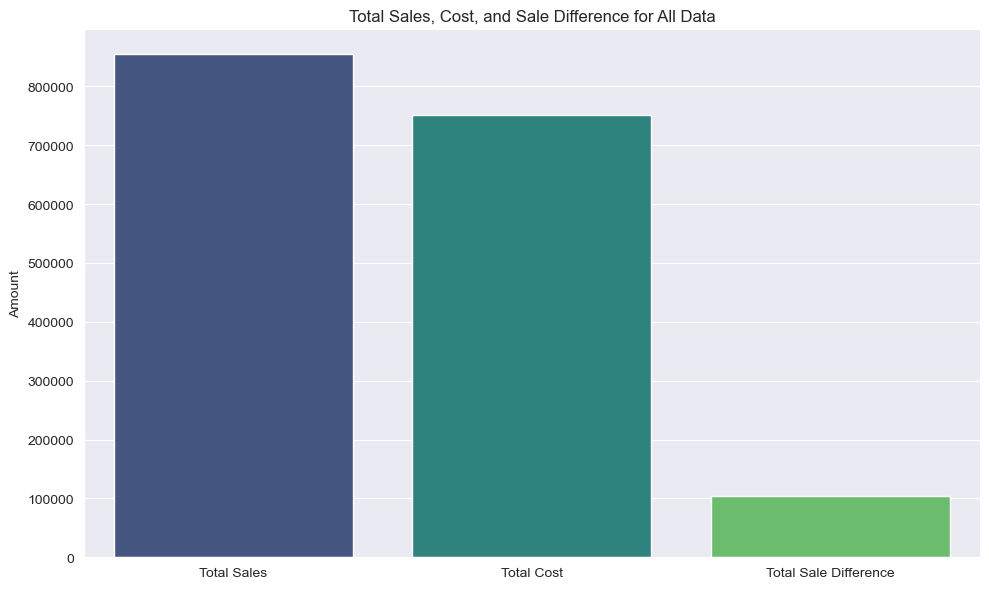

In [75]:
# Data for plotting
labels = ['Total Sales', 'Total Cost', 'Total Sale Difference']
values = [total_sales_all, total_cost_all, total_sale_difference_all]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=values, palette='viridis')
plt.title('Total Sales, Cost, and Sale Difference for All Data')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

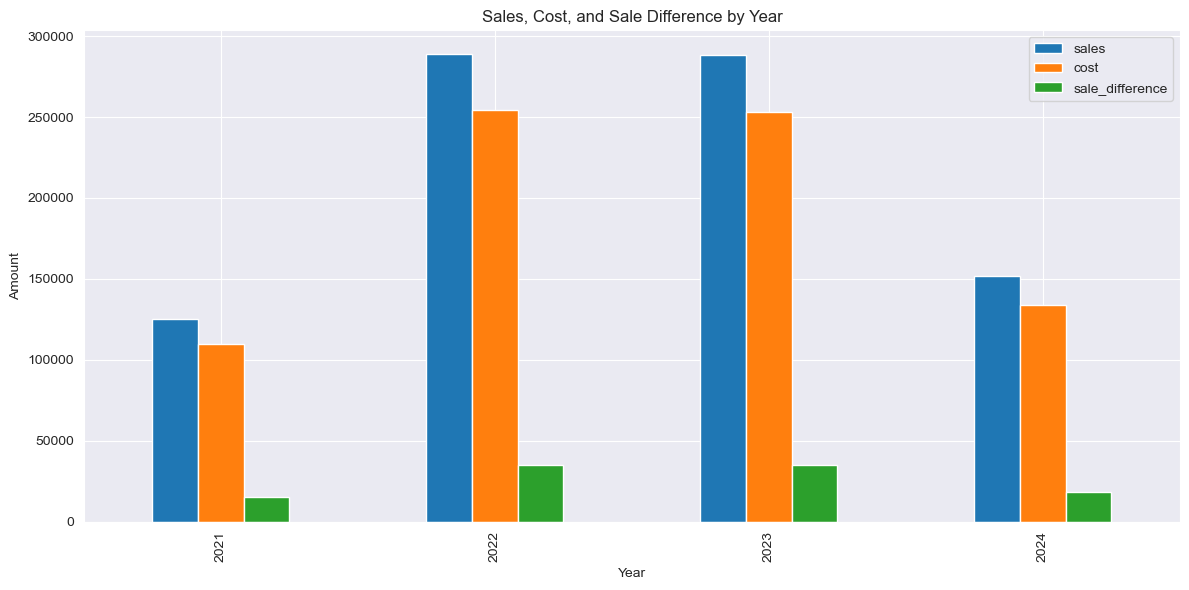

In [76]:
# Plot sales, cost, and sale difference by year
plot_bars(agg_year.set_index('year'), 'Sales, Cost, and Sale Difference by Year', 'Year', 'Amount')

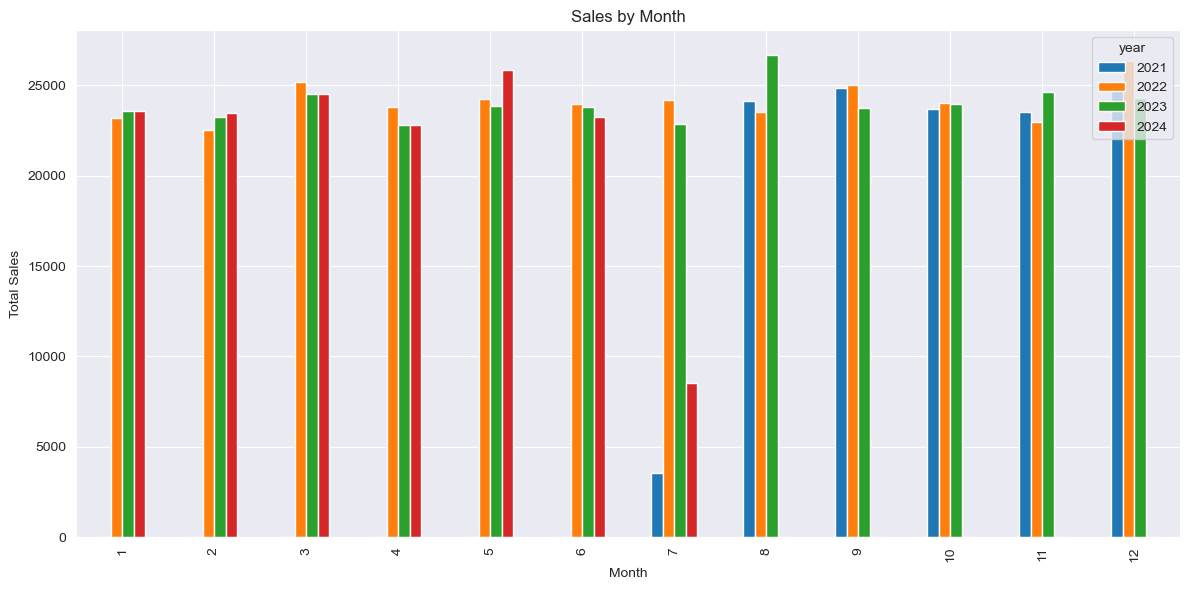

In [77]:
# Plot sales, cost, and sale difference by month (total in each month)
plot_bars(agg_month.pivot(index='month', columns='year', values='sales'), 'Sales by Month', 'Month', 'Total Sales')

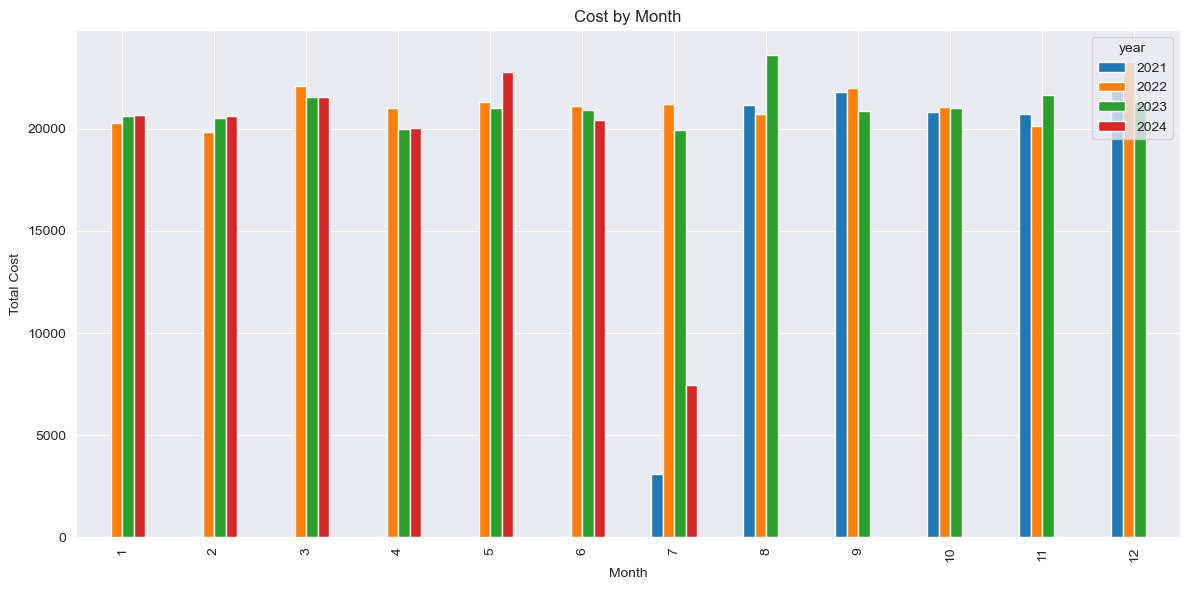

In [78]:
plot_bars(agg_month.pivot(index='month', columns='year', values='cost'), 'Cost by Month', 'Month', 'Total Cost')

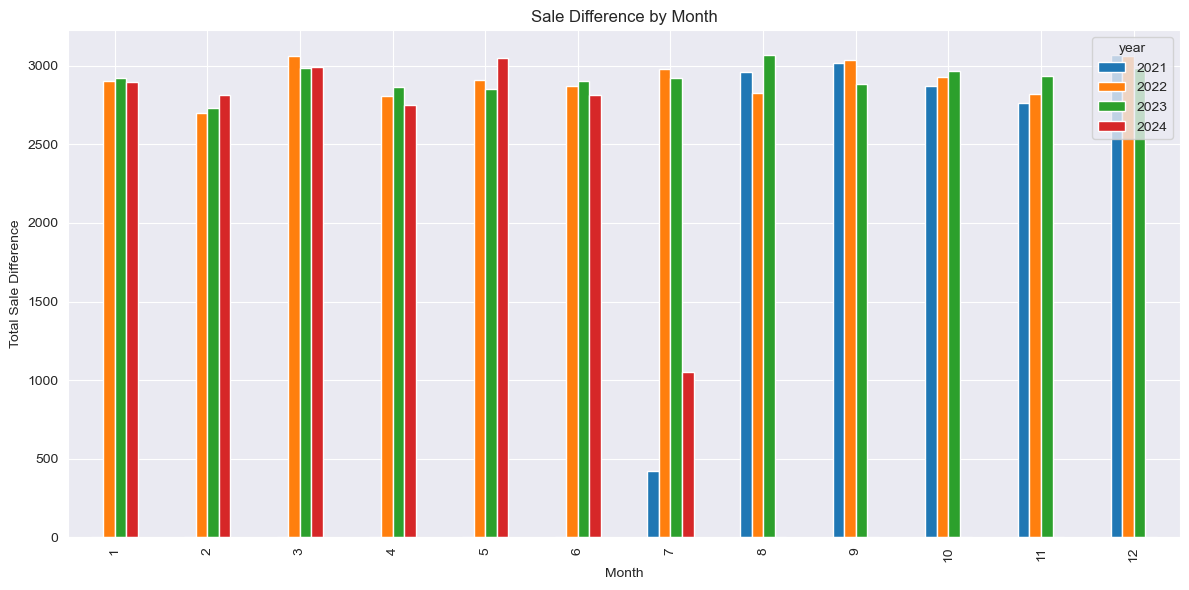

In [79]:
plot_bars(agg_month.pivot(index='month', columns='year', values='sale_difference'), 'Sale Difference by Month', 'Month',
          'Total Sale Difference')

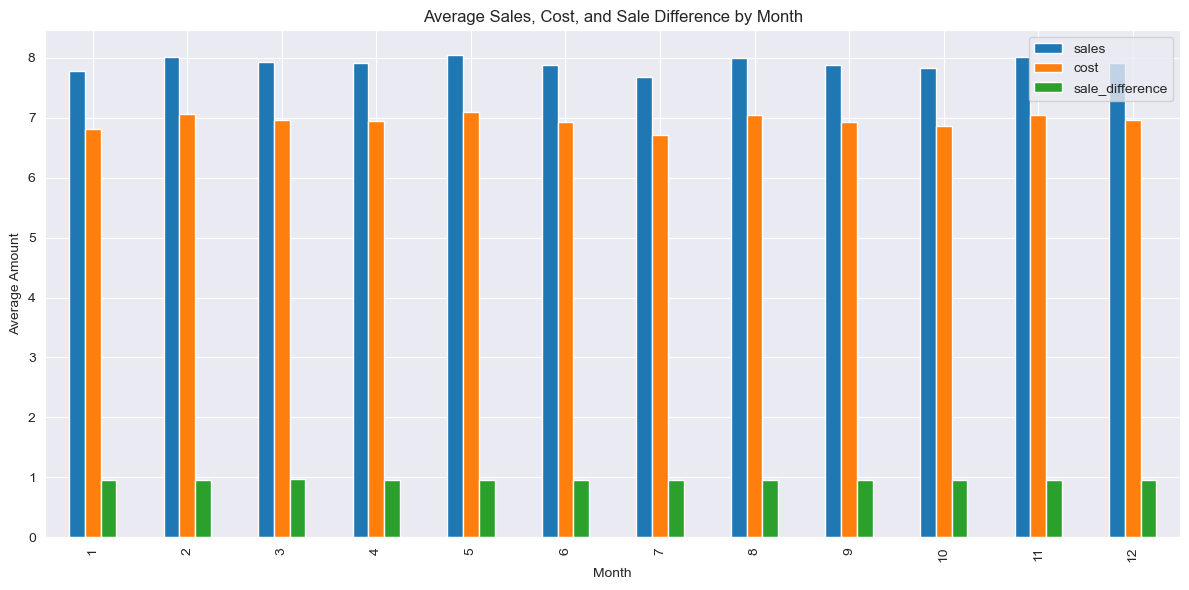

In [80]:
# Plot average sales, cost, and sale difference by month
plot_bars(agg_month_avg.set_index('month'), 'Average Sales, Cost, and Sale Difference by Month', 'Month',
          'Average Amount')

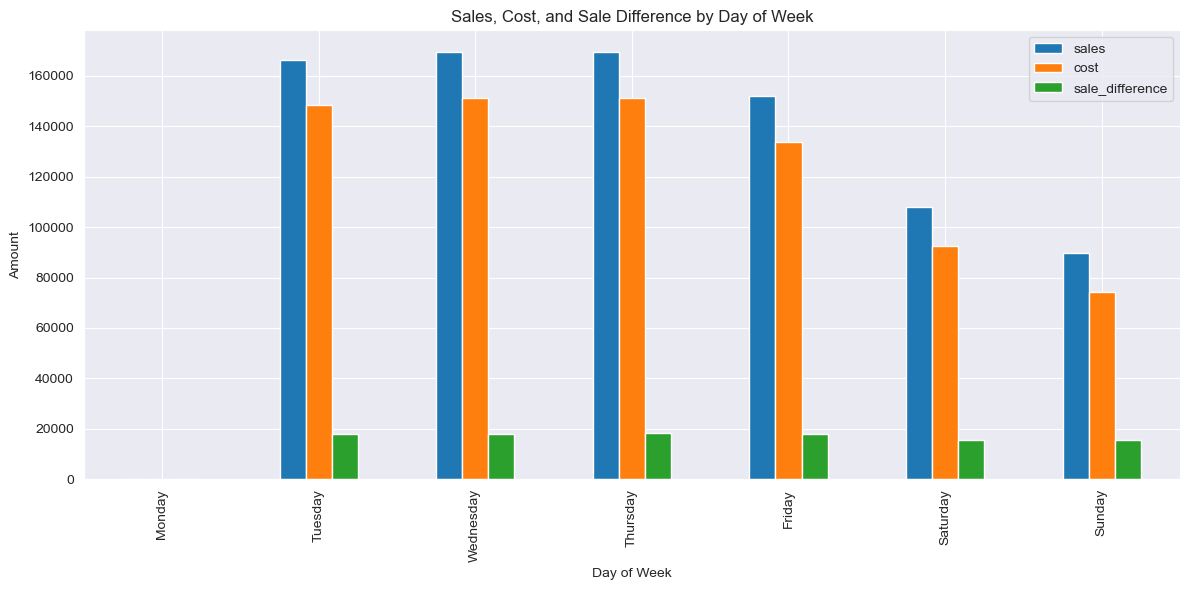

In [81]:
# Plot sales, cost, and sale difference by day of week
plot_bars(agg_day_of_week, 'Sales, Cost, and Sale Difference by Day of Week', 'Day of Week', 'Amount')

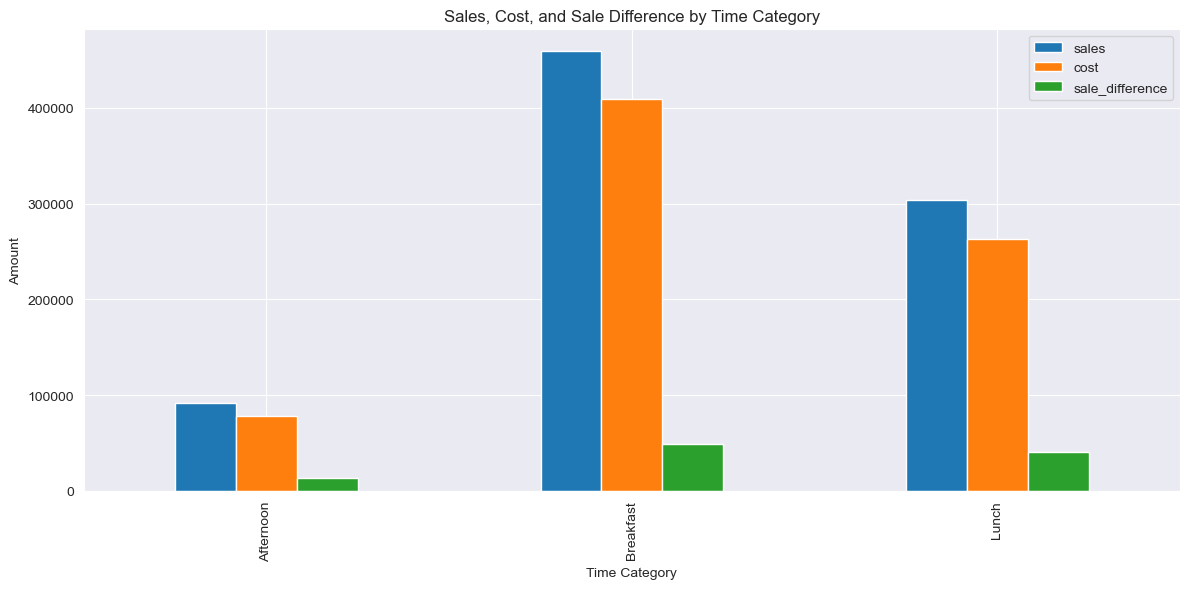

In [82]:
# Plot sales, cost, and sale difference by time category
plot_bars(agg_time_category, 'Sales, Cost, and Sale Difference by Time Category', 'Time Category', 'Amount')

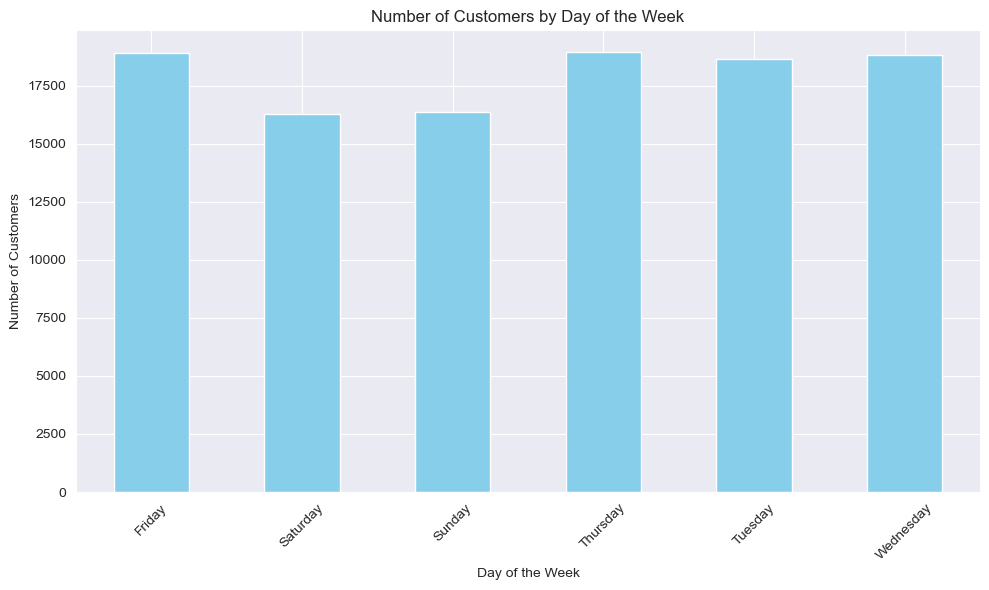

In [83]:
# Count number of customers per day of the week
daily_customers = sale_analyze_df.groupby('day_of_week').size()

# Plotting
plt.figure(figsize=(10, 6))
daily_customers.plot(kind='bar', color='skyblue')
plt.title('Number of Customers by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/p7/3v1qnlnx3b3gh19zsy8hhcw00000gn/T/ipykernel_2783/3021870451.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_customers = sale_analyze_df.groupby('time_category').size()


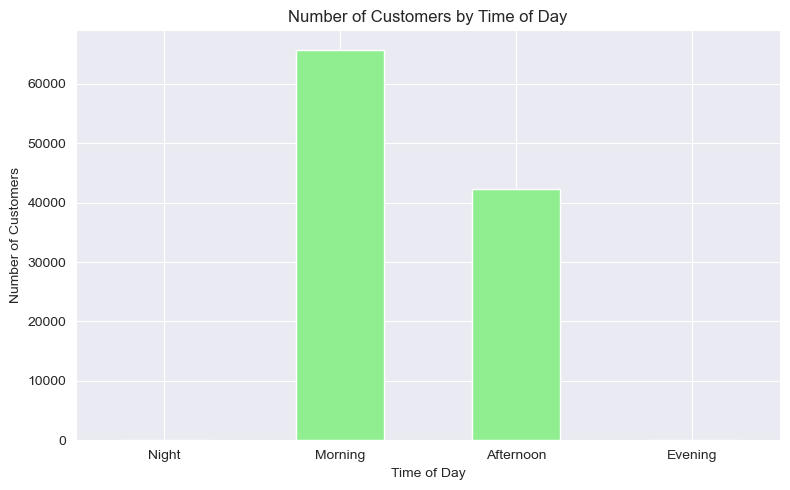

In [84]:
# Define time intervals for categorization
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']

# Create time categories based on hour of the day
sale_analyze_df['time_category'] = pd.cut(sale_analyze_df['date_time'].dt.hour, bins=bins, labels=labels, right=False)

# Count number of customers by time category
time_customers = sale_analyze_df.groupby('time_category').size()

# Plotting number of customers by time category
plt.figure(figsize=(8, 5))
time_customers.plot(kind='bar', color='lightgreen')
plt.title('Number of Customers by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Simulate simulation result reduce food loss, putting effort to lunch, etc. 

In [85]:
def reduce_food_loss(df, reduction_rate):
    """
    Simulate the effect of reducing food loss by a given rate.
    """
    df['reduced_cost'] = df['cost'] * (1 - reduction_rate)
    df['profit_increase'] = df['cost'] - df['reduced_cost']
    df['new_total_cost'] = df['total_cost'] - df['profit_increase'].sum()
    return df


def adjust_effort_in_time_categories(df, time_category, increase_rate):
    """
    Simulate the effect of putting more effort into a specific time category.
    """
    time_category_df = df[df['time_category'] == time_category].copy()
    time_category_df['increased_sales'] = time_category_df['sales'] * (1 + increase_rate)
    time_category_df['sales_increase'] = time_category_df['increased_sales'] - time_category_df['sales']
    df.loc[time_category_df.index, 'increased_sales'] = time_category_df['increased_sales']
    return df


def customer_visit_frequency_effect(df, increase_rate):
    """
    Simulate the effect of increasing customer visit frequency.
    """
    df['increased_sales'] = df['sales'] * (1 + increase_rate)
    df['sales_increase'] = df['increased_sales'] - df['sales']
    df['new_total_sales'] = df['total_sales'] + df['sales_increase'].sum()
    return df


def visualize_simulation_results(df, title, x_col, y_col):
    """
    Visualize the simulation results using seaborn and matplotlib.
    """
    plt.figure(figsize=(12, 6))
    sns.barplot(x=x_col, y=y_col, data=df)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()


# Simulate reducing food loss by 10%
reduced_food_loss_df = reduce_food_loss(sale_analyze_df, reduction_rate=0.1)

# Simulate putting 20% more effort into the lunch time category
increased_lunch_effort_df = adjust_effort_in_time_categories(sale_analyze_df, time_category='Morning',
                                                             increase_rate=0.2)

# Simulate increasing customer visit frequency by 15%
increased_customer_visit_df = customer_visit_frequency_effect(sale_analyze_df, increase_rate=0.15)

In [86]:
# Reduced Food Loss Simulation:
reduced_food_loss_df[['menu_name', 'cost', 'reduced_cost', 'profit_increase', 'new_total_cost']]

,menu_name,cost,reduced_cost,profit_increase,new_total_cost
0,Cheese & tomato,6.33,5.697,0.633,-74241.928
1,NEW YORK BAGEL BENEDICT,12.89,11.601,1.289,-74241.928
2,Hot Chocolate,3.60,3.240,0.360,-74241.928
3,"EGG, BACON & CHEESE TOASTIE",9.05,8.145,0.905,-74241.928
4,OPEN LAMB SOUVLAKI,18.04,16.236,1.804,-74241.928
...,...,...,...,...,...
107995,Flat White,2.69,2.421,0.269,-74219.178
107996,Latte,3.96,3.564,0.396,-74219.178
107997,Avocado & cheese,8.30,7.470,0.830,-74219.178
107998,Bacon & egg,7.16,6.444,0.716,-74219.178


In [87]:
# Increased Lunch Effort Simulation:
increased_lunch_effort_df[['menu_name', 'time_category', 'sales', 'increased_sales', 'sales_increase']]

,menu_name,time_category,sales,increased_sales,sales_increase
0,Cheese & tomato,Morning,7.0,8.050,1.050
1,NEW YORK BAGEL BENEDICT,Morning,13.0,14.950,1.950
2,Hot Chocolate,Morning,4.0,4.600,0.600
3,"EGG, BACON & CHEESE TOASTIE",Morning,10.5,12.075,1.575
4,OPEN LAMB SOUVLAKI,Morning,18.5,21.275,2.775
...,...,...,...,...,...
107995,Flat White,Afternoon,4.0,4.600,0.600
107996,Latte,Afternoon,4.5,5.175,0.675
107997,Avocado & cheese,Afternoon,9.0,10.350,1.350
107998,Bacon & egg,Afternoon,8.5,9.775,1.275


In [88]:
# Increased Customer Visit Frequency Simulation:
increased_customer_visit_df[['menu_name', 'sales', 'increased_sales', 'sales_increase', 'new_total_sales']]

,menu_name,sales,increased_sales,sales_increase,new_total_sales
0,Cheese & tomato,7.0,8.050,1.050,129040.9
1,NEW YORK BAGEL BENEDICT,13.0,14.950,1.950,129040.9
2,Hot Chocolate,4.0,4.600,0.600,129040.9
3,"EGG, BACON & CHEESE TOASTIE",10.5,12.075,1.575,129040.9
4,OPEN LAMB SOUVLAKI,18.5,21.275,2.775,129040.9
...,...,...,...,...,...
107995,Flat White,4.0,4.600,0.600,129071.4
107996,Latte,4.5,5.175,0.675,129071.4
107997,Avocado & cheese,9.0,10.350,1.350,129071.4
107998,Bacon & egg,8.5,9.775,1.275,129071.4


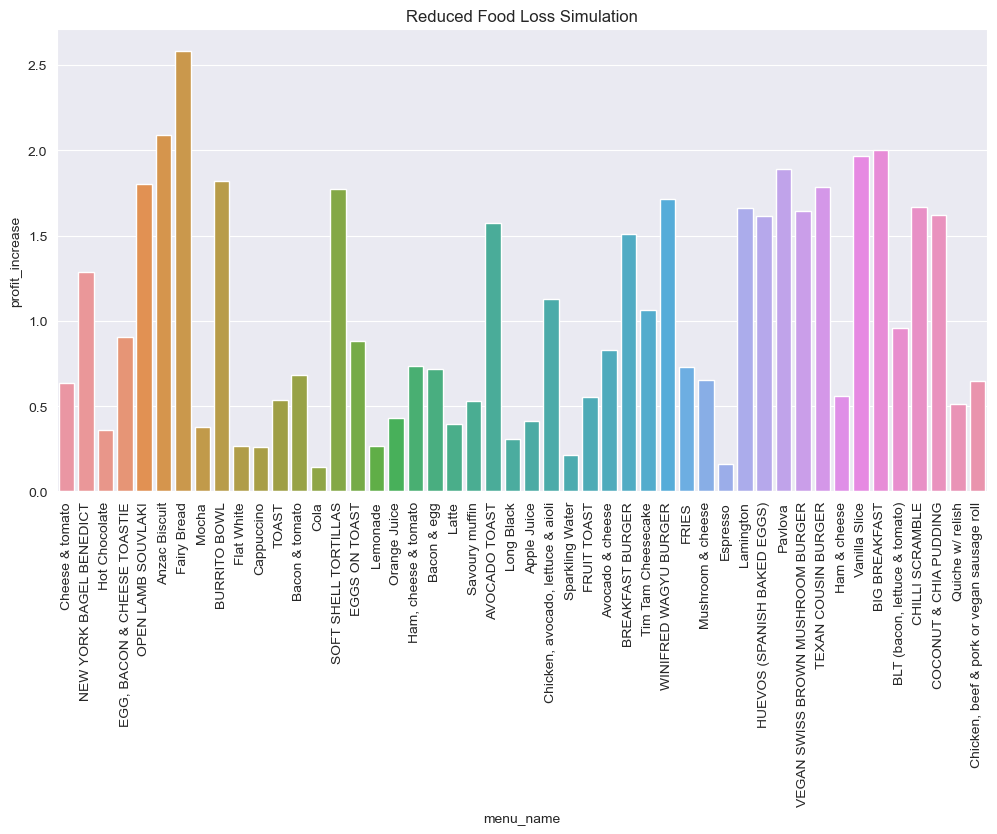

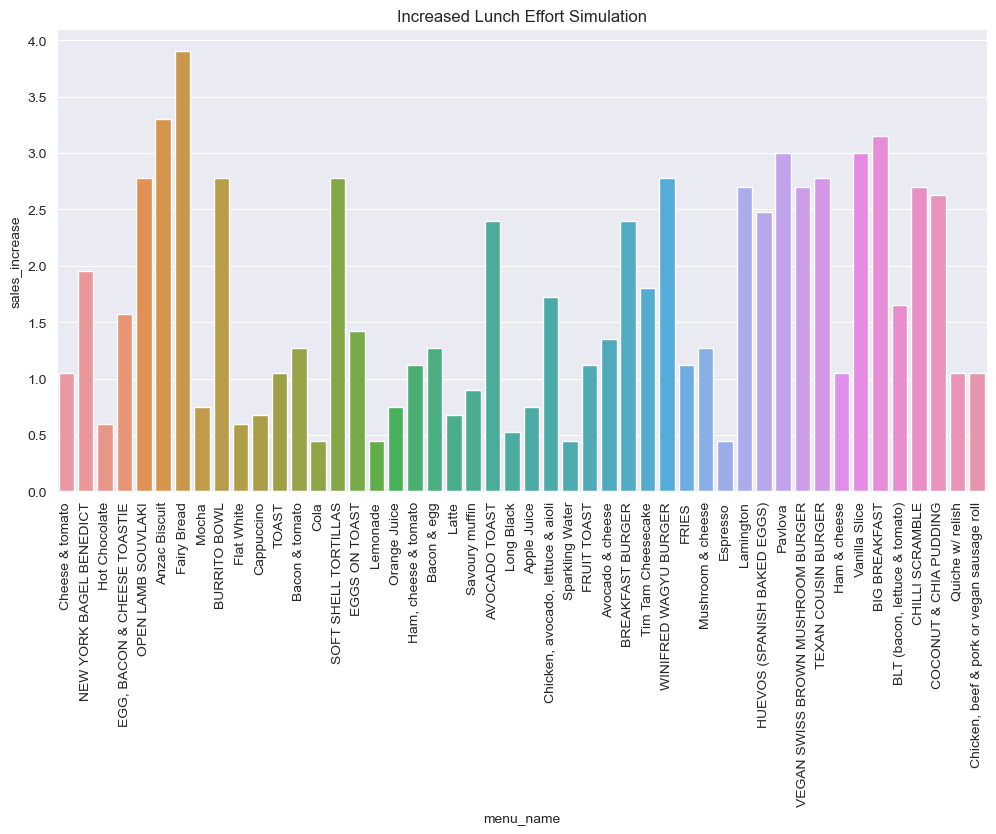

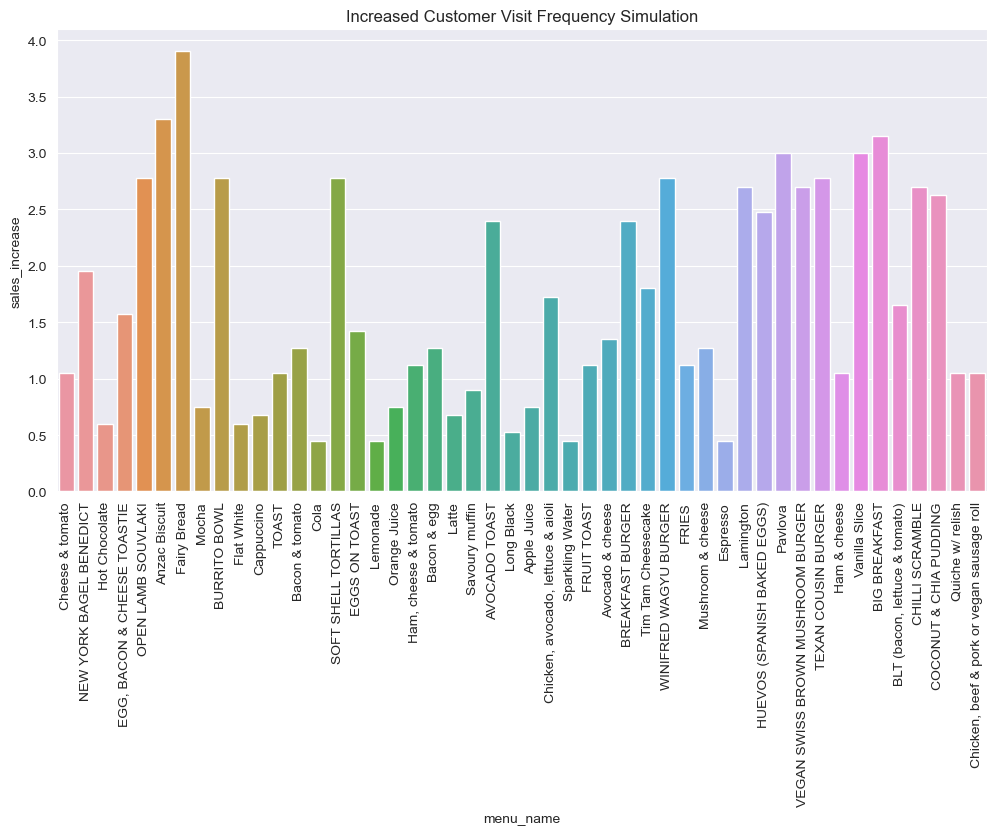

In [89]:
# Visualize the simulation results
visualize_simulation_results(reduced_food_loss_df, "Reduced Food Loss Simulation", "menu_name", "profit_increase")
visualize_simulation_results(increased_lunch_effort_df, "Increased Lunch Effort Simulation", "menu_name",
                             "sales_increase")
visualize_simulation_results(increased_customer_visit_df, "Increased Customer Visit Frequency Simulation", "menu_name",
                             "sales_increase")

In [92]:
sale_analyze_df.to_csv("./data/sale_analyze.csv")